*  This program tests 
*   the CAPM by using monthly data of the Fama-French 
*   25 portfolios sorted by size and book-to-market   

In [1]:
import pandas as pd                     # To load data, we use the package pandas
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm                      # We use this package to do estimation
%matplotlib inline

# Load the data 

df = pd.read_excel('Factors_July26_July11.xlsx')        # It has 5 columns:  date, mkt, size, b/m, riskree rate
                                                    # downloaded from Ken French's website
df2 = pd.read_excel('FF25_July26_July11.xlsx')       # return on 25 FF portfolios from Ken French's web

mkt = df.loc[:,"mkt"]/100                       # Mkt excess return;  divided by 100 due to data are in %
rf = df.loc[:,"rate"]/100

R1 = df2.loc[:,'FF1' : 'FF25']/100        # extract the 25 returns, R1 is T by 25. 

R1 = np.array(R1)                         # convert list to array to apply np.functions
rf = np.array(rf)                         # convert list to array to apply np.functions
T = len(df)                               # The number of obs
Re = np.ones((T,25))                           # creat storage for excess returns

for i in range(25):
    Re[:,i] = R1[:,i] - rf                # the excess return:  each indu substracts riskfree rate, Re[:,i]-rf


# The Sharpe ratio of the mkt, needed later for computing the GRS test
                        
mu = mkt.mean()                          # The expected mkt excess return
sig2 = mkt.var()                         # The var of the mkt excess return
sigma = np.sqrt(sig2)                    # Its vol
Sharpe = mu/sigma


In [2]:
# run regression of each asset on the mkt

x = np.array(mkt) 
x.shape = (T,1)                 # make sure the dimentionality

const = np.ones((T,1))          # The constant part
xx = np.hstack((const,x))         # Add the constant part to x

coeff = np.ones((25,2))           # to store all the alphas and betas
tRatio = np.ones((25,2))           # to store all the t-ratios

for i in range(25):
    y = np.array(Re[:,i])              # The i-th excess asset return
    y.shape = (T,1) 
    reg = sm.OLS(endog=y, exog=xx)
    results = reg.fit()
    coeff[i,:] = results.params           # paramter estimates, output of sm.OLS
    tRatio[i,:] = results.tvalues           # t-ratios or t-values, output of sm.OLS

              # paramter estimates, output of sm.OLS
print(' Regression coefficents: alphas and betas  \n')
# print(coeff)

for i in range(25):
    print('        {0:.4f}   {1:.4f}\n '.format(coeff[i,0], coeff[i,1])) 
print('  t-values or t-ratios    \n')
print(tRatio)



 Regression coefficents: alphas and betas  

        -0.0057   1.6294
 
        -0.0010   1.4576
 
        0.0015   1.3813
 
        0.0036   1.2960
 
        0.0052   1.3918
 
        -0.0019   1.2400
 
        0.0015   1.2674
 
        0.0030   1.1822
 
        0.0031   1.2246
 
        0.0035   1.3658
 
        -0.0012   1.2708
 
        0.0017   1.1250
 
        0.0026   1.1437
 
        0.0029   1.1278
 
        0.0027   1.3819
 
        0.0002   1.0680
 
        0.0006   1.0973
 
        0.0015   1.0970
 
        0.0021   1.1705
 
        0.0014   1.4371
 
        -0.0001   0.9653
 
        0.0002   0.9191
 
        0.0004   0.9770
 
        -0.0002   1.1284
 
        -0.0102   1.2327
 
  t-values or t-ratios    

[[ -2.12788341  33.5707599 ]
 [ -0.45633547  36.23112499]
 [  0.92155537  45.03617735]
 [  2.25573409  45.11962246]
 [  2.80354337  41.21594363]
 [ -1.44840107  50.60161341]
 [  1.28952039  57.90390409]
 [  2.68910242  58.57535906]
 [  2.65143739  58.15418317]
 [  2.390

In [4]:
# Compute the GRS test 

Alphas = coeff[:,0]
Alphas.shape = (25,1)
Betas = coeff[:,1]

E = Re - xx*coeff.T            # The residuals
Sigma = E.T*E / T              # The sample covariance matrix of the residuals 
SI = np.linalg.inv(Sigma)                # The inverse of Sigma
 
Q1 = Alphas.T@SI@Alpha                   #  Q1 = Alpha'*Sigma^(-1)*Alpha = Alpha'*Qw 

Q = Q1.item()                             # make an array to a scalar ! 

N=25
Theta2 = Sharpe*Sharpe
GRS=((T-N-1)/N)*Q/(1+Theta2)

from scipy.stats import f            # import the F-distribution function

c = f.cdf(GRS,N,T-N-1)              # This compute the F-distribution, Prob ( x < GRS )
GRSp=1-c                             #  P-value of the test decided by the F-distribution


print(' The qudatratic of the alphas, known also as pricing errors)   \n')
print(Q)
print('\n  The GRS test statistic   \n')
print(GRS)
print('\n The p-value   \n')
print(GRSp)

 The qudatratic of the alphas (known also as pricing errors)   

0.0980610118165522

  The GRS test statistic   

3.852415299646449

 The p-value   

9.277036916444104e-10


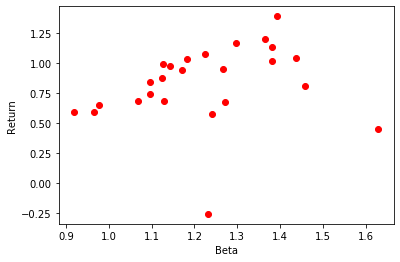

In [4]:
# plot the average returns vs betas

mu5 = np.mean(Re, axis = 0)              # the mean taking each column of the matrix, a row vector of 25
p=plt.plot(Betas,mu5*100,'ro')            # plot the raw data
plt.ylabel('Return') 
plt.xlabel('Beta')
plt.show()